In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import networkx as nx
from collections import Counter
from sklearn import base
import json
from matplotlib import pylab
import pickle

In [2]:
multiTimeline_df = pd.read_csv('multiTimeline.csv')

In [3]:
multiTimeline_df.head(10)

,Category: All categories,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,Week,stay at home: (United States),restaurant: (United States),recipe: (United States)
2,9/1/2019,<1,43,48
3,9/8/2019,<1,41,45
4,9/15/2019,<1,43,46
5,9/22/2019,<1,43,47
6,9/29/2019,<1,41,46
7,10/6/2019,<1,42,49
8,10/13/2019,<1,43,50
9,10/20/2019,<1,42,51


In [4]:
multiTimeline_df = multiTimeline_df.drop([0, 1]).rename({'Category: All categories': 'Dates','Unnamed: 1': 'Stay at Home',\
                                      'Unnamed: 2': 'Restaurant', 'Unnamed: 3': 'Recipe'}, axis = 1)

In [5]:
multiTimeline_df.loc[multiTimeline_df['Stay at Home'] == '<1', 'Stay at Home'] = 0.5

In [6]:
multiTimeline_df.head()

,Dates,Stay at Home,Restaurant,Recipe
2,9/1/2019,0.5,43,48
3,9/8/2019,0.5,41,45
4,9/15/2019,0.5,43,46
5,9/22/2019,0.5,43,47
6,9/29/2019,0.5,41,46


In [7]:
multiTimeline_df['Stay at Home'] = multiTimeline_df['Stay at Home'].astype(float)
multiTimeline_df['Restaurant'] = multiTimeline_df['Restaurant'].astype(float)
multiTimeline_df['Recipe'] = multiTimeline_df['Recipe'].astype(float)

In [8]:
multiTimeline_df['Dates'] = pd.to_datetime(multiTimeline_df['Dates'])

In [9]:
multiTimeline_df.head()

,Dates,Stay at Home,Restaurant,Recipe
2,2019-09-01,0.5,43.0,48.0
3,2019-09-08,0.5,41.0,45.0
4,2019-09-15,0.5,43.0,46.0
5,2019-09-22,0.5,43.0,47.0
6,2019-09-29,0.5,41.0,46.0


C:\Users\choibosu\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


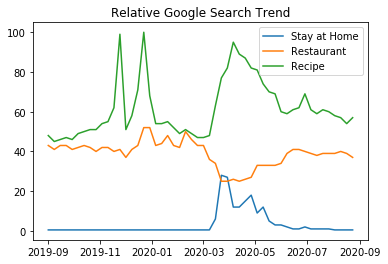

In [10]:
x = multiTimeline_df.Dates
y1 = multiTimeline_df['Stay at Home']
y2 = multiTimeline_df.Restaurant
y3 = multiTimeline_df.Recipe
plt.plot(x, y1, label = 'Stay at Home')
#plt.hold(True)
plt.plot(x, y2, label = 'Restaurant')
plt.plot(x, y3, label = 'Recipe')
plt.legend(loc='best')
plt.title('Relative Google Search Trend')
plt.legend()
plt.savefig('line_plot.png')
plt.show()

In [11]:
with open('recipes.data', 'rb') as recipes:
    # read the data as binary data stream
    data = pickle.load(recipes)

In [12]:
list_pairs = []
for recipe in data:
    ingredients_per_recipe=[]
    
    for ingredients in recipe['ingredients']:
        
        ingredients_per_recipe.append(ingredients['ingredient'])
        
    list_pairs.extend(list(itertools.combinations(ingredients_per_recipe,2)))      
    

In [13]:
G = nx.Graph(list_pairs)

In [14]:
pr = nx.pagerank(G, alpha = 0.85)

In [15]:
sorted_eigs = sorted(pr.items(), key = lambda x: x[1], reverse=True)

sorted_rank = []
i = 0;
for key, value in sorted_eigs[:100]:
    
   
    sorted_rank.append((key, value))

In [16]:
print(sorted_rank)

[('salt', 0.008176436247597079), ('water', 0.007780578991317667), ('butter', 0.007476254568940594), ('olive oil', 0.00700626786305559), ('onion', 0.006705928574058085), ('eggs', 0.006558361005895917), ('cloves garlic', 0.006198505560346426), ('white sugar', 0.006109329070595049), ('all purpose flour', 0.004994138840818403), ('vegetable oil', 0.004930171614804003), ('black pepper', 0.004489544071134098), ('brown sugar', 0.003711667455542859), ('milk', 0.0036941422913623822), ('carrots', 0.003237426752759164), ('salt black pepper to taste', 0.003173971467746805), ('tomatoes', 0.003115842757719762), ('celery', 0.0030138306102626923), ('lemon juice', 0.0030076698104833984), ('cinnamon', 0.0029417672663499977), ('onions', 0.0028429402446427158), ('vanilla extract', 0.002689564416983728), ('garlic', 0.002681856372326922), ('clove garlic', 0.002628570592155846), ('garlic powder', 0.002520009881896886), ('cumin', 0.0025038133628717024), ('cream cheese', 0.0024854476818081425), ('ginger', 0.002

In [17]:
type(G)

networkx.classes.graph.Graph

In [ ]:
def save_graph(graph,file_name):
    #initialze Figure
    #plt.figure(num=None, figsize=(20, 20), dpi=80)
    plt.figure()
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)

    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig

#Assuming that the graph g has nodes and edges entered
save_graph(G,"my_graph.png")

#it can also be saved in .svg, .png. or .ps formats